# Cheap Housing in Pittsburgh
 *Notebook by Emme Brent*
 
 
Import the necessary resources before starting: 

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

## The Metric
Graduating from college is once again the start fo a new phase in one's life. While many choose to continure their education in grad school, or move somewhere else for different opportunities, many former students will stay in the area (in this case Pittsburgh) to try to find employment. However, you may not find a job right away, or if you do it may not be in the field you worked so hard to get a degree in, and you may be waiting tables to make ends meet until a position opens up. Add to that the likely factor that you have student loans, and the fact that you are now a full adult wiht less outside support from family or the school, and you're probably pretty broke. So, you need to find cheap housing.

## The Dataset
The dataset I am using today from the WPRDC is from the Pittsburgh American Community Survey in 2015, where renters were asked what their "contract rent" was, specifically focusing on cash rent. Most people are not in a place to buy a house right out of college, so viewing rented properties should cover most of what housing a recent graduate would be looking to move in to. Contract rent is the monthly payment agreed upon or contracted for, and for vacant units it is the rent that was listed at the time of data collection. The rent was then split into ranges of prices, and the number of dwellings under each price range in each neighborhood was listed. 

### Limitations of the Dataset
This dataset is from 2015 and the market may have changed since that time (especially with the market boom in 2020/21), but this dataset should still be able to give a rough estimate of the relative prices of neighborhoods, even if there is some change due to development or changing markets. Additionally, the dataset does not include information on utilities, which changes the overall cost of living someplace. Sometimes, utilities are inlcuded in the rent, which would also influence the distribution. I am not calculating utlities in my analysis today, because they can vary greatly depending on the number of people living somewhere, the size of the dwelling, and how updated the place is; I also don't know if it has already been included in some of the numbers. However, it is worth mentioning that utilities would increase the prices of these places, some to a greater extent than others. 

Import the dataset: 

In [2]:
contract_rent_pandas = pd.read_csv("contract-rent.csv", 
                                       index_col="Neighborhood")

To start with, I will just be seeing which neighborhood has the most housing for rent, regardless of price. More housing available means a higher chance for a variety of housing options and prices, and it can also indicate a more residential area which tends to have more amenities close by such as groceries, outdoor spaces, libraries, etc. Having these close by means a person will spend less money traveling to use those places, and can cut down on cost that way. Below are the top 15 neighborhoods with the most housing available for rent. 

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

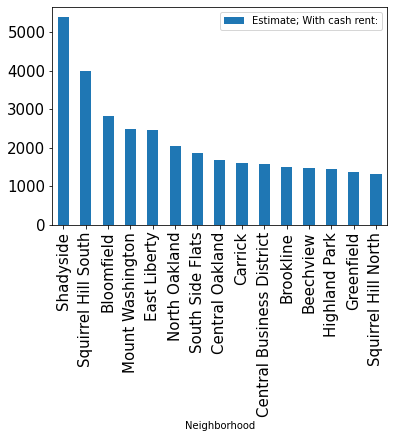

In [3]:
contract_rent_pandas["Estimate; With cash rent:"].sort_values(ascending = False).head(15).plot.bar()
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

From this bar graph, we can see that Shadyside and Squirrel Hill South have much more housing for rent than the other neighborhoods, though this graph does not give any indication for how expensive it is. After Bloomfield, the amount of housing for rent in each neighborhood decreases more gradually.

## Narrowing the metric 
The average Pitt graduate will earn approximately \\$45,438 a year upon graduating, if they seek full time employment (based on rough calculations from the class of 2018 class graduation data from the Career Center). If you are to follow the advice to spend 30% of ypur income on rent, you can afford a monthly rent of \\$1,136. As that is the average, and many will earn less than that (also for taxes and simplicities sake), I will round down to \\$1,000 per month. 

First, I will create a list of columns with the estimates for the number of homes available for rents under $1000. Then, I will take the sum of those columns for each neighborhood and create a bar graph to compare to the one above: 

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

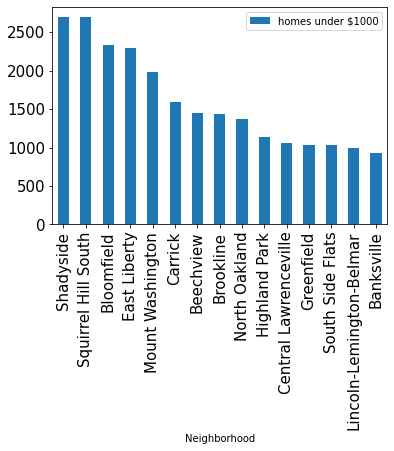

In [4]:
column_list = list(contract_rent_pandas)
columns_to_remove = ["Neighborhood" , "Id" , "Estimate; Total:" , "Margin of Error; Total:" , "Estimate; With cash rent:" , "Margin of Error; With cash rent:" , 
                    "Margin of Error; With cash rent: - Less than $100" , "Margin of Error; With cash rent: - $100 to $149" , "Margin of Error; With cash rent: - $150 to $199" , 
                    "Margin of Error; With cash rent: - $200 to $249" , "Margin of Error; With cash rent: - $250 to $299" , "Margin of Error; With cash rent: - $300 to $349" , 
                    "Margin of Error; With cash rent: - $350 to $399" , "Margin of Error; With cash rent: - $400 to $449" , "Margin of Error; With cash rent: - $450 to $499" , 
                    "Margin of Error; With cash rent: - $500 to $549" , "Margin of Error; With cash rent: - $550 to $599" , "Margin of Error; With cash rent: - $600 to $649" , 
                    "Margin of Error; With cash rent: - $650 to $699" , "Margin of Error; With cash rent: - $700 to $749" , "Margin of Error; With cash rent: - $750 to $799" , 
                    "Margin of Error; With cash rent: - $800 to $899" , "Margin of Error; With cash rent: - $900 to $999" , "Margin of Error; With cash rent: - $1,000 to $1,249" , 
                    "Margin of Error; With cash rent: - $1,250 to $1,499" , "Margin of Error; With cash rent: - $1,500 to $1,999" , "Margin of Error; With cash rent: - $2,000 to $2,499" , 
                    "Margin of Error; With cash rent: - $2,500 to $2,999" , "Margin of Error; With cash rent: - $3,000 to $3,499" , "Margin of Error; With cash rent: - $3,500 or more" , 
                    "Estimate; With cash rent: - $1,000 to $1,249" , "Estimate; With cash rent: - $1,250 to $1,499" , "Estimate; With cash rent: - $1,500 to $1,999" , 
                    "Estimate; With cash rent: - $2,000 to $2,499" , "Estimate; With cash rent: - $2,500 to $2,999" , "Estimate; With cash rent: - $3,000 to $3,499" , 
                    "Estimate; With cash rent: - $3,500 or more" , "Estimate; No cash rent" , "Margin of Error; No cash rent" , "homes under $1000"]

homes_under_1000 = sorted( list(set(column_list) - set(columns_to_remove)))
#print(homes_under_1000)


contract_rent_pandas["homes under $1000"] = contract_rent_pandas[homes_under_1000].sum(axis = 1)

contract_rent_pandas["homes under $1000"].sort_values(ascending = False).head(15).plot.bar()
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

While Shadyside and Squirrel Hill South are still the two neighborhoods with the most rented housing, the difference between them and the other neighborhoods has significantly decreased, indicating a large amount of it was more expensive housing (and the housing remaining may trend to the more expensive end of the scale). Otherwise, many of the same neighborhoods are represented, though some have changed order. Central Lawrenceville, Lincoln-Lemington-Belmar, and Banksville are now represented in the top 15, while Central Oakland, the Central Business District, and Squirrel Hill North have dropped from the top 15. 

To get a better idea of location and these neighborhoods' proximities to each other, I read in the shape file of Pittsburgh's neighborhoods: 

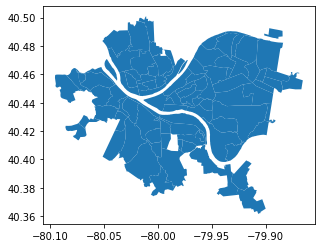

In [5]:
neighborhoods = gpd.read_file("Neighborhoods_.shp")
neighborhoods.plot()

After that, I merged it with the Contract Rent dataframe and plotted the "homes under $1000" column on the map.

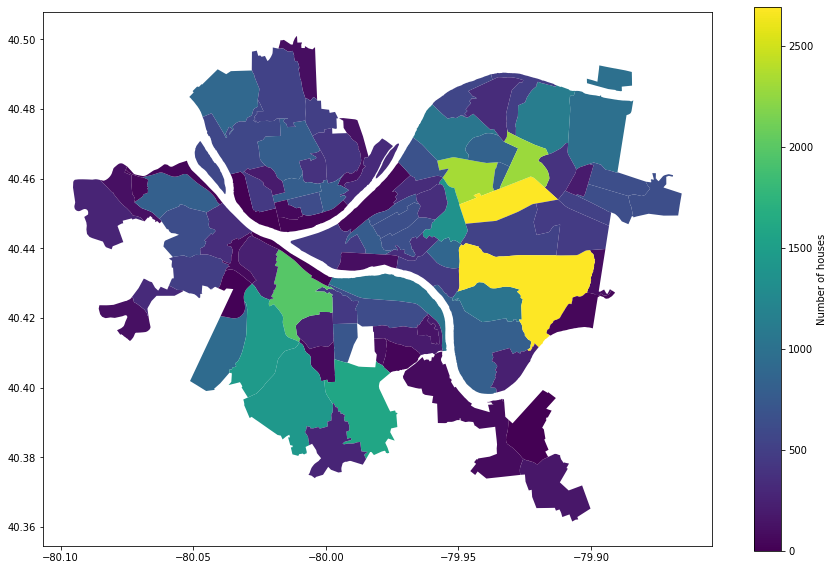

In [10]:
housing_map = neighborhoods.merge(contract_rent_pandas, how='left', left_on='hood', right_on='Neighborhood')

housing_map[['hood','homes under $1000','geometry']].head()
housing_map.plot(column = "homes under $1000" , legend = True , legend_kwds = {"label" : "Number of houses"} , figsize = (15 , 10))


By looking at the map, we can see that Shadyside, Bloomfield, and East Liberty are a cluster of neighborhoods with a relatively high amount of rented housing for under \\$1000. Mount Washington, Beechview, Brookline, and Carrick form another sort of cluster, with slightly lower numbers than the other cluster but still high overall. Squirrel Hill South is a stand-alone neighborhood in terms of high amounts of rental properties for under \\$1000, but it is a large neighborhood on its own. 

From the map and the histrogram below, we can see that most of the neighborhoods have less than 500 houses that are rented for under \\$1000. More housing options for below that amount (\\$1000) will be more beneficial to most recent college graduates. Barring a job in that neighborhood which would cut down on commute costs, or a higher concentration of very cheap housing in one neighborhood (which I will examine next), the best neighborhood will generally be one with the most potential housing availability for under \\$1000.

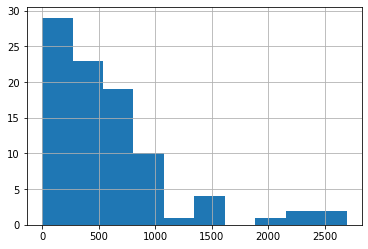

In [7]:
contract_rent_pandas["homes under $1000"].hist(bins = 10)

Finally, I creater another dataframe with only the list of columns I created earlier to remove the most expensive rent categories as well as the margin of error columns. From this, I plotted each neighborhood on a subplot bar graph to compare the number of houses in each price range to each other in an easily viewable format (there were too many neighborhoods to realistically compare them on a multi-bar graph).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7effd3a30f40>,
      dtype=object)

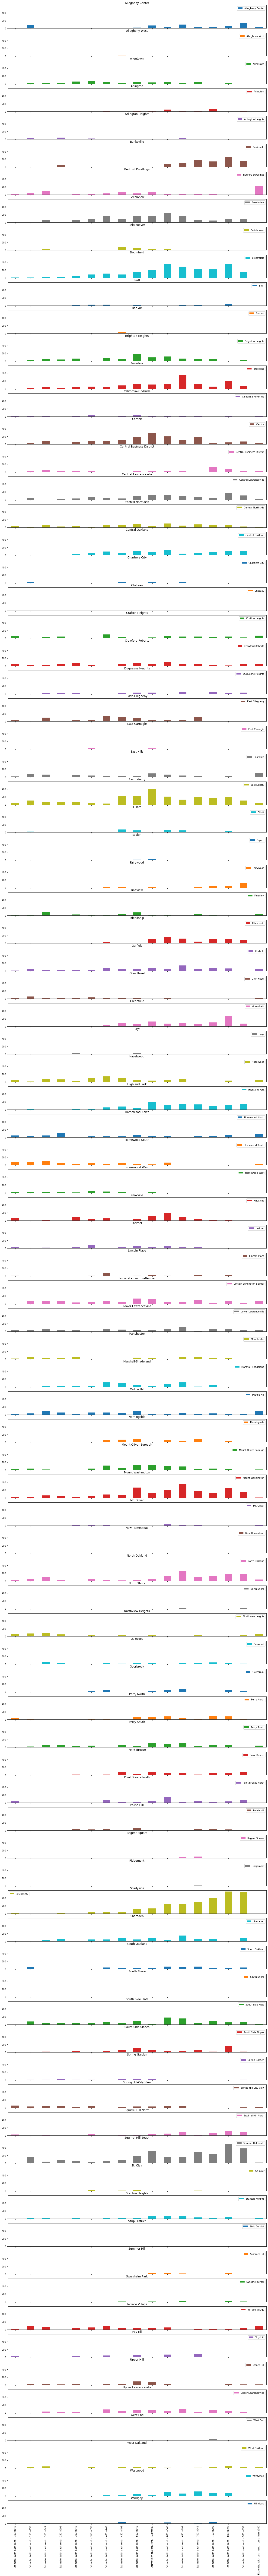

In [8]:
contract_rent_woMOE = contract_rent_pandas[homes_under_1000]


contract_rent_woMOE.loc["Allegheny Center":"Windgap"].T.plot.bar(subplots = True , sharey = True , figsize = (20, 200))

By using these bar graphs, we can determine the best neighborhood in Pittsburgh based on cheap housing, with a few different options to account for what may be more important to different people. First, any bar graph where all the bars are too small to see a clear pattern has been discounted; there is not enough rented housing in this price range to get a clear picture of what is available. Of the ones that have enough rented housing to see patterns in, the neighborhoods can be grouped as follows: 

* More housing rented on the upper-end of the price range: Allegheny Center, Banksville, Bloomfield, Central Lawrenceville, Central Oakland, Fairywood, Friendship, Greenfield, Highland Park, Mount Washington, North Oakland, Perry North, Shadyside, Squirrel Hill North, Squirrel Hill South, Westwood

* More housing rented in the middle of the price range: Beechview, Brighton Heights, Carrick, East Allegheny, East Liberty, Hazelwood, Knoxville, Marshall-Shadeland, Morningside, Mount Oliver Borough, Perry South, Southside Flats, Upper Hill 

* Neighborhoods with a fairly consistent number of houses across the price range: Allentown, Bedford Dwellings, Central Northside, Crafton Heights, Crawford-Roberts, East Hills, Garfield, Homewood North, Homewood South, Larimer, Lincoln-Lemington-Belmar, Lower Lawrencville, Middle Hill, Northview Heights, Oakwood, Point Breeze, Polish Hill, Sheraden, South Oakland, Southside Slopes, Spring Hill-City View, Terrace Village, Upper Lawrenceville, West Oakland



## Conclusion
The best neighborhood for a recent college graduate to live in is Squirrel Hill South. While the prices are on the higher side of under $1000, they are still slightly lower than Shadyside. Squirrel Hill also has rented properties across all price ranges, and the second highest total number of rented properties, so there are many options for a recent college graduate, no matter their price range. Additionally, the higher median indicates it is likely a nicer/more desirable area overall. Shadyside is a close second, as it has even more rented properties and is next to tow other neighborhoods with a higher number of rented properties, but due to the higher average price in Shadyside, Squirrel Hill South is likely to be more accessible to more recent graduates.

However, if one is struggling to find a job right out of college and needs cheaper rent than average, one of the neighborhoods with more housing in the middle of the price range, such as East Liberty, would be more ideal. Mount Washington, Beechview, Brookline, and Carrick also fall in to the category of slightly lower prices and slightly less renter properties, but they do have the advantage of being in a cluster together. If one is looking to go extremely cheap, there are a few neighborhoods like Homewood South which actually have more rented properties at the bottom of the scale. However, generally speaking it would be better to rent a bigger/more expensive place in a nicer area and get roommates than to live in a very cheap very terrible apartment alone. 

